<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/RO/materialy/cv10/cifar_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab/'

Using TensorFlow backend.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Načítame si dataset cifar-10

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


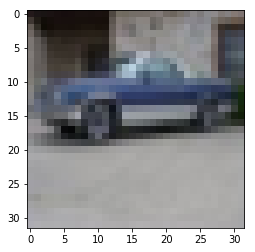

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

x_val = x_train[:10000]
y_val = y_train[:10000]
x_train = x_train[10000:]
y_train = y_train[10000:]

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


plt.imshow(x_train[0])
plt.show()

Dáta si upravíme opäť na floaty.

In [0]:
x_val = x_val.astype(np.float32)/255
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

Vyrobíme si model.

In [0]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Na konci modelu budeme mať už len plne prepojené vrstvy musíme preto použiť vrstvu Flatten

In [0]:
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Model kompilujeme a môžeme trénovať.

In [6]:
loss = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adam()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

callbacks = []
#checkpoint = keras.callbacks.ModelCheckpoint(
#    root_path + 'cifar_{epoch:02d}-{val_loss:.8f}-{val_acc:.4f}.hdf5',
#    verbose=1)
#callbacks.append(checkpoint)

epochs = 10
batch_size = 32


history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_val, y_val),
                   callbacks = callbacks)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 10s 242us/step - loss: 1.6232 - acc: 0.4111 - val_loss: 1.4162 - val_acc: 0.4951
Epoch 2/10
40000/40000 [==============================] - 7s 169us/step - loss: 1.2774 - acc: 0.5492 - val_loss: 1.1876 - val_acc: 0.5817
Epoch 3/10
40000/40000 [==============================] - 7s 169us/step - loss: 1.1452 - acc: 0.5960 - val_loss: 1.1874 - val_acc: 0.5911
Epoch 4/10
40000/40000 [==============================] - 7s 168us/step - loss: 1.0640 - acc: 0.6297 - val_loss: 1.0578 - val_acc: 0.6324
Epoch 5/10
40000/40000 [==============================] - 7s 182us/step - loss: 1.0061 - acc: 0.6490 - val_loss: 1.0144 - val_acc: 0.6486
Epoch 6/10
40000/40000 [==============================] - 7s 181us/step - loss: 0.9612 - acc: 0.6670 - val_loss: 0.9871 - val_acc: 0.6597
E

Pozrieme priebeh trénovania.

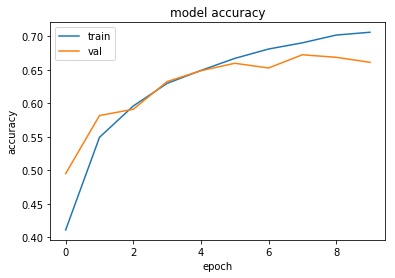

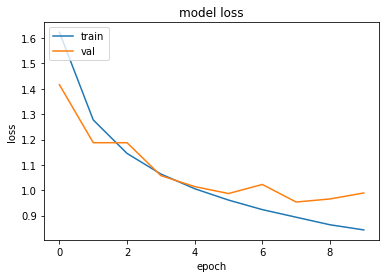

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 70us/step
Test loss: 1.015272433757782
Test accuracy: 0.6622


Na koniec model uložíme.

In [0]:
model.save(root_path + 'cifar-fc-trained.h5')